In [1]:
# importing required library

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3


In [2]:
# define connection and cursor

connection =  sqlite3.connect("data/database.sqlite")

cursor = connection.cursor()

In [3]:
# reading tables from database

tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table'; """, connection)


# Check if tables were read successfully

tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [4]:
# Joining 2 tables to get resultant table with all the player names and their attributes. 

player_attributes = pd.read_sql_query("""SELECT * FROM Player Name JOIN Player_Attributes A1 ON A1.player_api_id = Name.player_api_id""", connection)

player_attributes.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,player_fifa_api_id,player_api_id,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
type(player_attributes)

pandas.core.frame.DataFrame

In [6]:
player_attributes.shape # len of data

(183978, 49)

In [8]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_api_id        183978 non-null  int64  
 2   player_name          183978 non-null  object 
 3   player_fifa_api_id   183978 non-null  int64  
 4   birthday             183978 non-null  object 
 5   height               183978 non-null  float64
 6   weight               183978 non-null  int64  
 7   id                   183978 non-null  int64  
 8   player_fifa_api_id   183978 non-null  int64  
 9   player_api_id        183978 non-null  int64  
 10  date                 183978 non-null  object 
 11  overall_rating       183142 non-null  float64
 12  potential            183142 non-null  float64
 13  preferred_foot       183142 non-null  object 
 14  attacking_work_rate  180748 non-null  object 
 15  defensive_work_ra

In [86]:
# gk_attrs = ['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes'] #to use later

In [11]:
player_attributes = player_attributes.drop(['id', 'player_fifa_api_id', 'player_api_id','birthday'], axis=1)
# not required for analysis!

In [41]:
player_attributes.head() # reduced to 42 columns from 49

,player_name,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Appindangoye,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,Aaron Appindangoye,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,Aaron Appindangoye,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,Aaron Appindangoye,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [13]:
# getting each player's most recent rating.
max_dates = player_attributes.groupby('player_name')['date'].max()

In [42]:
max_dates.head()

player_name
Aaron Appindangoye    2016-02-18 00:00:00
Aaron Cresswell       2016-04-21 00:00:00
Aaron Doran           2016-01-07 00:00:00
Aaron Galindo         2016-04-21 00:00:00
Aaron Hughes          2015-12-24 00:00:00
Name: date, dtype: object

In [43]:
df = pd.DataFrame(max_dates)
#df['player_name'] = df.index
df = df.reset_index()

In [44]:
merged_df = df.merge(player_attributes,how='left')

In [46]:
merged_df.head()

,player_name,date,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,2016-02-18 00:00:00,182.88,187,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Cresswell,2016-04-21 00:00:00,170.18,146,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
2,Aaron Doran,2016-01-07 00:00:00,170.18,163,65.0,67.0,right,medium,medium,64.0,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
3,Aaron Galindo,2016-04-21 00:00:00,182.88,198,69.0,69.0,right,medium,medium,57.0,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
4,Aaron Hughes,2015-12-24 00:00:00,182.88,154,70.0,70.0,right,medium,medium,46.0,...,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0


In [48]:
len(merged_df['player_name'].unique())

10848

In [47]:
merged_df.shape # reduced the data to 10,853 unique players

(10853, 42)

In [50]:
# Now the dataset has 5 duplicate rows, we need to drop them too.
merged_df.drop_duplicates(subset=['player_name'],inplace=True)
merged_df.shape

(10848, 42)

In [51]:
merged_df.isna().sum()[merged_df.isna().sum()>0]

attacking_work_rate    519
volleys                458
curve                  458
agility                458
balance                458
jumping                458
vision                 458
sliding_tackle         458
dtype: int64

In [61]:
merged_df.dropna(subset=['volleys','curve','agility','balance','jumping','vision','sliding_tackle'],inplace=True)

# removed NA values in collected columns

In [63]:
merged_df.isna().sum()[merged_df.isna().sum()>0]

attacking_work_rate    164
dtype: int64

In [74]:
merged_df['attacking_work_rate'].value_counts()

medium    6838
high      2346
low        554
None       393
norm        55
le          14
stoc        14
y           12
Name: attacking_work_rate, dtype: int64

In [77]:
merged_df['attacking_work_rate'] = merged_df['attacking_work_rate'].replace({'norm':'medium','y':'medium','le':'medium','None':'medium','stoc':'high'})

In [81]:
merged_df['attacking_work_rate'] = merged_df['attacking_work_rate'].fillna('medium')

In [82]:
merged_df.columns

Index(['player_name', 'date', 'height', 'weight', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [90]:
merged_df.isna().sum()

player_name            0
date                   0
height                 0
weight                 0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [95]:
merged_df['defensive_work_rate'].value_counts()

medium    7186
high      1535
low       1017
o          206
_0         164
ormal       55
1           34
2           31
5           23
3           21
7           19
6           15
tocky       14
0           14
ean         14
4           13
9           12
es          12
8            5
Name: defensive_work_rate, dtype: int64

In [100]:
merged_df['defensive_work_rate'] = merged_df['defensive_work_rate'].replace({'3':'medium','4':'medium','5':'medium','6':'medium','ormal':'medium','ean':'medium',
                                          '7':'high','8':'high','9':'high','tocky':'high',
                                          '_0':'low','0':'low','o':'low','1':'low','2':'low','es':'low'})

In [101]:
merged_df.info() # all the categorical variables handled.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10390 entries, 0 to 10852
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_name          10390 non-null  object 
 1   date                 10390 non-null  object 
 2   height               10390 non-null  float64
 3   weight               10390 non-null  int64  
 4   overall_rating       10390 non-null  float64
 5   potential            10390 non-null  float64
 6   preferred_foot       10390 non-null  object 
 7   attacking_work_rate  10390 non-null  object 
 8   defensive_work_rate  10390 non-null  object 
 9   crossing             10390 non-null  float64
 10  finishing            10390 non-null  float64
 11  heading_accuracy     10390 non-null  float64
 12  short_passing        10390 non-null  float64
 13  volleys              10390 non-null  float64
 14  dribbling            10390 non-null  float64
 15  curve                10390 non-null 

## Feature Selection

Text(0.5, 1.0, 'Missing Values in %')

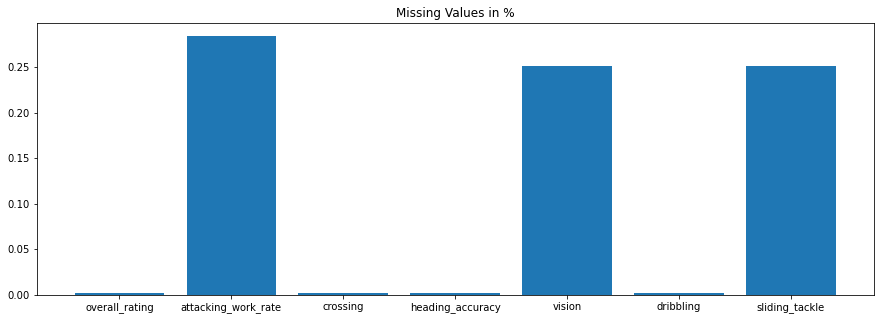

In [37]:
df1 = merged_df[['overall_rating','attacking_work_rate','crossing','heading_accuracy','vision','dribbling','sliding_tackle']].isnull().sum().T/player_attributes.shape[0]*100
plt.figure(figsize=(15,5))
plt.bar(df1.index, df1)
plt.title('Missing Values in %')

In [59]:
player_attributes = player_attributes.dropna(axis=0 , subset=['overall_rating'])
player_attributes.shape

(183142, 42)

In [60]:
player_attributes.isnull().sum()[player_attributes.isnull().sum()>0]

attacking_work_rate    2394
volleys                1877
curve                  1877
agility                1877
balance                1877
jumping                1877
vision                 1877
sliding_tackle         1877
dtype: int64

In [61]:
player_attributes = player_attributes.dropna(axis=0, subset=['volleys'])

In [62]:
player_attributes.shape

(181265, 42)

In [63]:
player_attributes.isnull().sum()[player_attributes.isnull().sum()>0]

attacking_work_rate    911
dtype: int64

In [75]:
merged_df.columns

Index(['player_name', 'date', 'height', 'weight', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [64]:
player_attributes['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [66]:
player_attributes['attacking_work_rate'].mode()[0]

'medium'

In [67]:
player_attributes.loc[player_attributes['attacking_work_rate'].isnull() , 'attacking_work_rate' ] = player_attributes['attacking_work_rate'].mode()[0]

In [68]:
player_attributes['attacking_work_rate'].value_counts()

medium    125981
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [70]:
player_attributes['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
o           1328
_0           911
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [71]:
pd.crosstab(player_attributes['attacking_work_rate'], player_attributes['defensive_work_rate'])

defensive_work_rate,0,1,2,3,4,5,6,7,8,9,_0,ean,es,high,low,medium,o,ormal,tocky
attacking_work_rate,,,,,,,,,,,,,,,,,,,
None,168,377,245,220,89,203,145,193,65,126,0,0,0,69,7,82,1328,0,0
high,11,9,13,0,0,17,13,5,0,4,0,0,0,7939,5727,29085,0,0,0
le,0,0,0,0,0,0,0,0,0,0,0,78,0,0,0,0,0,0,0
low,0,0,0,12,18,0,0,0,0,0,0,0,0,3319,695,4525,0,0,0
medium,9,35,76,11,9,11,21,9,5,13,911,0,0,15714,12003,97154,0,0,0
norm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,317,0
stoc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86
y,0,0,0,0,0,0,0,0,0,0,0,0,94,0,0,0,0,0,0


In [92]:
ngk_player_attributes = player_attributes.drop(gk_attrs,axis=1)

<AxesSubplot:>

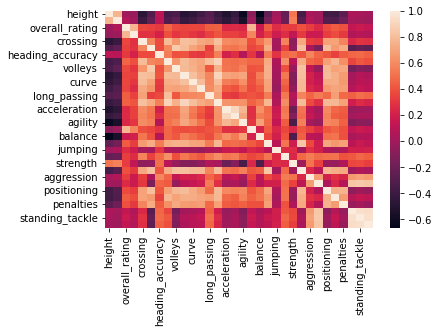

In [93]:
sns.heatmap(ngk_player_attributes.corr())

In [82]:
player_attributes[player_attributes['gk_diving']>50]['gk_diving'].count()

14556

***we have droped four attributes which are not neccessery for our regression model, the four attributes are 'id', 'player_fifa_api_id', 'player_api_id', 'date'***